# K-Nearest Neighbor Classification

After perform Exploratory Data Analysis, it is needed to make prediction about the classification for our model. In this section, I choose to use the K-Nearest Neighbor (KNN) to perform the data classification.

We will look through both **BEST** and **WORST** cases, based on my choosen independent variable with the number of Fatality from each cases in the dataset. The result may help us analyze what aspects yeild the most fatalities in the highway car accidents.

In [1]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

**Use the same file as in the EDA.**

In [2]:
#Data source: 
#https://www.nhtsa.gov/file-downloads?p=nhtsa/downloads/FARS/

In [3]:
# Import the orginal dataset
accident_data = pd.read_csv('accident.csv',encoding_errors='ignore')
df=accident_data.loc[accident_data['STATENAME']=="Maryland"]
df.head(5)

C:\Users\PREDATOR\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (40,42) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,STATE,STATENAME,ST_CASE,VE_TOTAL,VE_FORMS,PVH_INVL,PEDS,PERSONS,PERMVIT,PERNOTMVIT,...,HOSP_MN,HOSP_MNNAME,CF1,CF1NAME,CF2,CF2NAME,CF3,CF3NAME,FATALS,DRUNK_DR
15136,24,Maryland,240001,2,2,0,1,3,3,1,...,88,Not Applicable (Not Transported),0,None,0,None,0,None,1,0
15137,24,Maryland,240002,3,3,0,0,3,3,0,...,88,Not Applicable (Not Transported),0,None,0,None,0,None,1,0
15138,24,Maryland,240003,2,2,0,1,4,4,1,...,99,Unknown EMS Hospital Arrival Time,0,None,0,None,0,None,1,0
15139,24,Maryland,240004,1,1,0,1,1,1,1,...,99,Unknown EMS Hospital Arrival Time,0,None,0,None,0,None,1,0
15140,24,Maryland,240005,2,2,0,0,2,2,0,...,88,Not Applicable (Not Transported),26,Prior Non-Recurring Incident,0,None,0,None,1,0


Just like the EDA, I will only analyze the accidents in **Maryland** state.

**Use FATALS Column as the Dependent Variable in the Classfication Analysis.**

In [4]:
Y=df['FATALS'].copy()
Y.head(5)

15136    1
15137    1
15138    1
15139    1
15140    1
Name: FATALS, dtype: int64

## Best Case - K Nearest Neighbor Classification

For the best case, my assumption is that the number of fatality is depend on the number of drunk driver, the type of area (urban or rural), and the first harmful event.

**Terminology**

1. **First Harmful Event**
**Label**: HARM_EV
**Definition**: This data element describes the first injury or damage producing event of the crash.

2. **Number of Drinking Drivers**
**Label**: DRUNK_DR
**Definition**: This data element records the number of drinking drivers involved in the crash. 

3. **Land Use**
**Label**: RUR_URB
**Definition**: This data element identifies the classification of the segment of the trafficway on which the crash occurred based on FHWA-approved adjusted Census boundaries of small urban and urbanized areas.
   
**Sources**: https://crashstats.nhtsa.dot.gov/Api/Public/ViewPublication/813254

In [5]:
# Setting independent variables
X=df[['DRUNK_DR','HARM_EV','RUR_URB']].copy()
X.head(5)

,DRUNK_DR,HARM_EV,RUR_URB
15136,0,8,2
15137,0,21,2
15138,0,8,2
15139,0,8,2
15140,0,12,2


**Scatterplot each combination of Independent and Dependent variables**

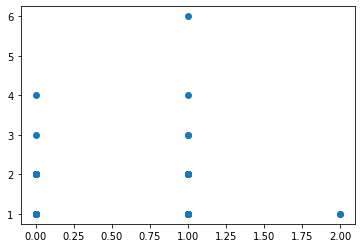

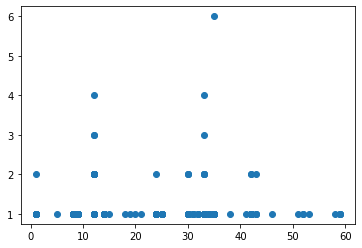

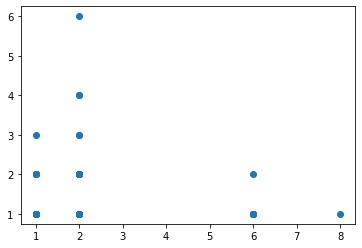

In [6]:
for col in X:
  plt.scatter(X[col],Y)
  plt.show()

**Develop your Test Train Split of the data**

After define the independent and dependent variables, I will split the data in 3, 2/3 of the data is to train, and the other will be tested to make prediction.

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=1/3, random_state=1)

**Perform the Classification Analysis using 1 to 10 Nearest Neighbors.**

We will see the accurary of the model as the number of nearest negihbors increase from 1 to 10. We will see how well the model is.

In [8]:
numNeighbors = [1,2,3,4,5,6,7,8,9,10]

#KNN Classification
def knnClasification(numNeighbors,X_train, X_test, Y_train, Y_test):
    trainAcc = []
    testAcc = []
    for k in numNeighbors:
        clf = KNeighborsClassifier(n_neighbors=k, metric='minkowski', p=2)
        clf.fit(X_train, Y_train)
        Y_predTrain = clf.predict(X_train)
        Y_predTest = clf.predict(X_test)
        trainAcc.append(accuracy_score(Y_train, Y_predTrain))
        testAcc.append(accuracy_score(Y_test, Y_predTest))
    return trainAcc, testAcc

Text(0, 0.5, 'Accuracy')

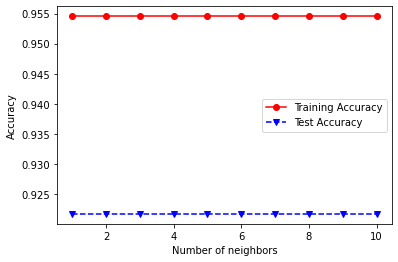

In [9]:
trainAcc, testAcc = knnClasification(numNeighbors,X_train, X_test, Y_train, Y_test)

# Plot the graph
plt.plot(numNeighbors, trainAcc, 'ro-', numNeighbors, testAcc,'bv--')
plt.legend(['Training Accuracy','Test Accuracy'])
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')

In [10]:
# Test Accuracy as number of nearest neighbors increase
formattedTestAcc = ["%.2f" % member for member in testAcc]
print(formattedTestAcc)

['0.92', '0.92', '0.92', '0.92', '0.92', '0.92', '0.92', '0.92', '0.92', '0.92']


## Worst Case - K Nearest Neighbor Classification

For the worst case, my assumption is that the number of fatality is depend on the route, milepoint, and the reason reported behind the fatal crashes.

**Terminology**

1. **Milepoint**
**Label**: MILEPT
**Definition**: This data element records the milepoint nearest to the location where the crash occurred

2. **Related Factors- Crash Level 1**
**Label**: CF1
**Definition**: This data element records factors related to the crash expressed in the case material.

3. **Route Signing**
**Label**: ROUTE
**Definition**: This data element identifies the route signing of the trafficway on which the crash 

**Sources**: https://crashstats.nhtsa.dot.gov/Api/Public/ViewPublication/813254

In [11]:
X=df[['ROUTE','MILEPT','CF1']].copy()
X.head(5)

,ROUTE,MILEPT,CF1
15136,3,17,0
15137,1,317,0
15138,3,30,0
15139,6,2,0
15140,1,143,26


**Scatterplot each combination of Independent and Dependent variables**

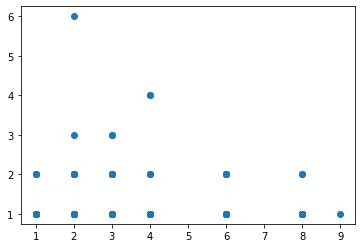

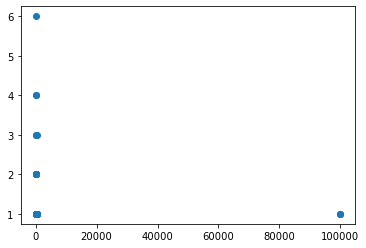

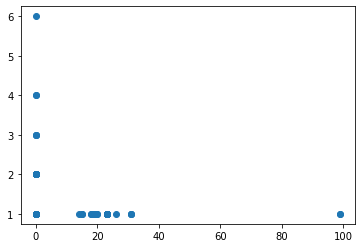

In [12]:
for col in X:
  plt.scatter(X[col],Y)
  plt.show()

**Develop Test Train Split of the data**

In [13]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=1/3, random_state=1)

**Perform the Classification Analysis using 1 to 10 Nearest Neighbors.**

Text(0, 0.5, 'Accuracy')

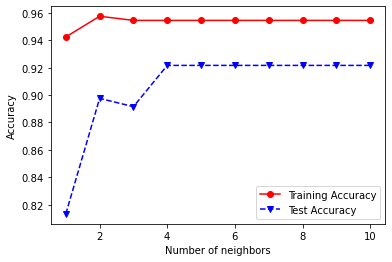

In [14]:
trainAcc, testAcc = knnClasification(numNeighbors,X_train, X_test, Y_train, Y_test)

# Plot the graph
plt.plot(numNeighbors, trainAcc, 'ro-', numNeighbors, testAcc,'bv--')
plt.legend(['Training Accuracy','Test Accuracy'])
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')

In [15]:
# Test Accuracy as number of nearest neighbor increase
formattedTestAcc = ["%.2f" % member for member in testAcc]
print(formattedTestAcc)

['0.81', '0.90', '0.89', '0.92', '0.92', '0.92', '0.92', '0.92', '0.92', '0.92']


## Results

For the **good** classification analysis, with dependent variable as the number of fatalities, the test yield a very high acruracy with number of drunk drivers, the type of first harmful event, and the type of area. As we take 1/3 of the data to train, the test accruracy of the 1 nearest neighbor is high, more than 0.92.

<br>

In the **worst** classification analysis, with dependent variable as the number of fatalities, yield a decent acruracy with the type of route signing, the milepoint nearest to the crash location, and related crash factors. As we take 1/3 of the data to train again, the test accruracy of the 1 nearest neighbor is only 0.81 . We also see a drop in the test accruracy with the 3 nearest neighbors.

<br>
Overall, there were no significant finding from both good and worst analysis. Due to the limited resources and time, further research is needed.